In [59]:
import pandas
dataset = pandas.read_csv('data/customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
X = dataset.iloc[:, [3, 4]].values

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [62]:
kmeans.inertia_

44448.455447933709

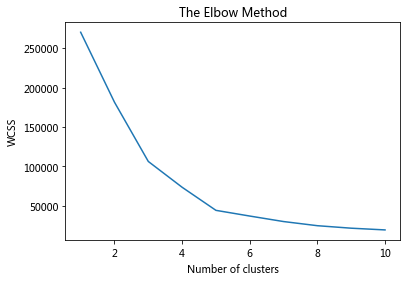

In [63]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_kmeans))

Silhouette Coefficient: 0.554


In [68]:
import matplotlib.pyplot as plt
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    sil.append(metrics.silhouette_score(X, y_kmeans))


In [69]:
sil

[0.29689691625030079,
 0.46761358158775435,
 0.49319631092490468,
 0.55393199744464805,
 0.53976103063432002,
 0.52642837036857282,
 0.45827056882053113,
 0.4565077334305076,
 0.45925273534781125]

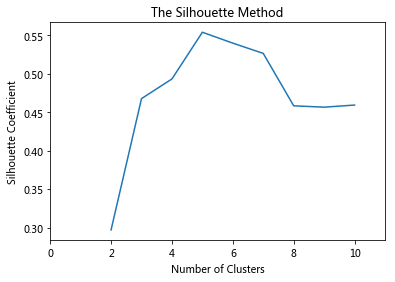

In [70]:
plt.plot(range(2, 11), sil)
plt.xlim([0,11])
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [71]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# ward
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(X)

#complete
complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_complete = complete.fit_predict(X)

# kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

for est, title in zip([y_ward,y_complete, y_kmeans], ['ward', 'complete', 'kmeans']):
    print(title, metrics.silhouette_score(X, est))

ward 0.552994595515
complete 0.552994595515
kmeans 0.553931997445
